1. Importando as bibliotecas necessárias.

In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
dados_aluguel = pd.read_csv("base-alugueis-sp.csv")
dados_aluguel.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


Entendendo os dados


*   address: Endereço
*   district: bairro
*   area: área do imóvel, em m²
*   bedrooms: quantidade de quartos
*   garage: quantidade de vagas de garagem
*   type: tipo do imóvel
*   rent: valor do aluguel, em R$
*   total: valor das despesas totais do imóvel






2. Obtendo informações do conjunto de dados

In [3]:
dados_aluguel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   11657 non-null  object
 1   district  11657 non-null  object
 2   area      11657 non-null  int64 
 3   bedrooms  11657 non-null  int64 
 4   garage    11657 non-null  int64 
 5   type      11657 non-null  object
 6   rent      11657 non-null  int64 
 7   total     11657 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 728.7+ KB


Observações: Na base de dados há 11657 linhas e 8 colunas, sendo que em nenhuma coluna há valores nulos.
Há 5 colunas do tipo inteiro (int64) e 3 colunas do tipo texto (object). Os tipos correspondem aos valores esperados em cada coluna.

3. Identificando e tratando dados duplicados

In [4]:
dados_aluguel.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
11652,False
11653,False
11654,False
11655,False


In [5]:
dados_aluguel.duplicated().sum()

0

Análise: Não há dados duplicados.

4. Identificando dados nulos

In [6]:
dados_aluguel.isna()

,address,district,area,bedrooms,garage,type,rent,total
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
11652,False,False,False,False,False,False,False,False
11653,False,False,False,False,False,False,False,False
11654,False,False,False,False,False,False,False,False
11655,False,False,False,False,False,False,False,False


In [7]:
dados_aluguel.isna().sum()

,0
address,0
district,0
area,0
bedrooms,0
garage,0
type,0
rent,0
total,0


Não há dados nulos.

5. Analisando outliers


In [8]:
dados_aluguel.describe()

,area,bedrooms,garage,rent,total
count,11657.000000,11657.000000,11657.000000,11657.000000,11657.000000
mean,84.655658,1.966286,1.060393,3250.814789,4080.030625
std,74.020536,0.931313,1.132349,2650.711557,3352.480274
min,0.000000,0.000000,0.000000,500.000000,509.000000
25%,40.000000,1.000000,0.000000,1590.000000,1996.000000
50%,60.000000,2.000000,1.000000,2415.000000,3057.000000
75%,96.000000,3.000000,2.000000,3800.000000,4774.000000
max,580.000000,6.000000,6.000000,25000.000000,28700.000000


Na tabela acima, vemos algumas informações estatísticas de cada coluna. Por exemplo, a contagem de amostras (count), a média (mean), o desvio padrão (std), o valor mínimo (min) e o valor máximo (max). Também são apresentados os valores de Q1,Q2 (ou mediana) e Q3, onde estão 25%, 50% e 75% dos valores, respectivamente.

Ao observar a coluna 'area', vemos que o valor mínimo é 0. Entretanto, não pode existir um imóvel sem área. Dessa forma, iremos verificar quantos e quais são os registros com esse tipo de situação.

In [48]:
dados_aluguel[dados_aluguel['area'] == 0]


,address,district,area,bedrooms,garage,type,rent,total
2983,Rua Relíquia,Jardim das Laranjeiras,0,2,1,Apartamento,1600,2569
7085,Rua Edmundo de Amicis,Morumbi,0,3,2,Casa,3200,3351


Vemos que os registros de índice 2983 e 7085 possuem a área como 0. Esses imóveis apresentam ainda valores de aluguel iguais a 1600 e 3200, respectivamente. Sabemos que a correlação entre área e valor do aluguel deve ser proporcional. Dessa forma, esses valores são considerados outliers e serão descartados da análise para que não prejudiquem os modelos matemáticos.

Vamos verificar também os casos de imóveis sem quartos.

In [49]:
dados_aluguel[dados_aluguel['bedrooms'] == 0]

,address,district,area,bedrooms,garage,type,rent,total
71,Rua Natividade Saldanha,São Lucas,22,0,0,Studio e kitnet,900,1126
98,Rua Natividade Saldanha,São Lucas,19,0,0,Studio e kitnet,850,1052
163,Rua João José Pacheco,Jardim Vila Mariana,22,0,0,Studio e kitnet,2200,2808
259,Rua Riskallah Jorge,Centro Histórico de São Paulo,28,0,0,Studio e kitnet,1207,1647
476,Rua Doutor Miguel Vieira Ferreira,Tatuapé,30,0,0,Apartamento,1840,2113
493,Rua Natividade Saldanha,São Lucas,32,0,0,Studio e kitnet,1200,1532
569,Rua Albino Boldasso Gabril,Vila Cruzeiro,44,0,0,Studio e kitnet,1400,1598
604,Rua Natividade Saldanha,São Lucas,29,0,0,Studio e kitnet,1150,1452
631,Avenida São João,Santa Cecilia,35,0,0,Studio e kitnet,935,1348
708,Rua Doutor Albuquerque Lins,Santa Cecília,63,0,0,Studio e kitnet,1600,2186


Poderíamos pensar que os imóveis do tipo "Studio e kitnet" fossem apresentados como contendo 0 quartos. Porém, vemos também que há casas (de 200 e 250m²) contendo 0 quartos. Esses valores são estranhos e iremos verificar se são outliers.

In [54]:
dados_aluguel[dados_aluguel['type'] == 'Studio e kitnet']

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654
7,Avenida Cásper Líbero,Centro,26,1,0,Studio e kitnet,1727,2244
12,Rua Henrique Sertório,Tatuapé,32,1,0,Studio e kitnet,2100,2598
...,...,...,...,...,...,...,...,...
11554,Avenida Cauaxi,Alphaville Industrial,38,1,1,Studio e kitnet,3800,3947
11558,Alameda Mamoré,Alphaville Industrial,40,1,1,Studio e kitnet,3200,4182
11575,Avenida Marcos Penteado de Ulhôa Rodrigues,Tamboré,50,1,1,Studio e kitnet,3500,4610
11580,Avenida Marcos Penteado de Ulhôa Rodrigues,Tamboré,51,1,1,Studio e kitnet,6300,7406


Vamos verificar também o caso do registro com valor de aluguel igual a R$ 25 mil.

In [97]:
dados_aluguel[dados_aluguel['rent'] == 25000]


,address,district,area,bedrooms,garage,type,rent,total
6095,Avenida Chibarás,Planalto Paulista,24,1,0,Studio e kitnet,25000,26710


Vemos que se trata de uma kitnet com área de 24m². Este valor de aluguel parece discrepante em relação ao tamanho do imóvel, mesmo que saibamos que o valor de aluguel de um imóvel depende de muitos outros fatores além da metragem. Portanto, este registro será removido.

Podemos ver que os tipos Studio e kitnet podem conter 1 quarto. Dessa forma, iremos remover os registros que apresentam 0 quartos e também os registros que apresentam área como 0.

In [58]:
dados_aluguel = dados_aluguel[dados_aluguel['area'] != 0]

In [59]:
dados_aluguel[dados_aluguel['area'] == 0]

,address,district,area,bedrooms,garage,type,rent,total


In [60]:
dados_aluguel = dados_aluguel[dados_aluguel['bedrooms'] != 0]

In [61]:
dados_aluguel[dados_aluguel['bedrooms'] == 0]

,address,district,area,bedrooms,garage,type,rent,total


In [102]:
dados_aluguel = dados_aluguel[dados_aluguel['rent'] != 25000]

In [103]:
dados_aluguel[dados_aluguel['rent'] == 25000]

,address,district,area,bedrooms,garage,type,rent,total


Vemos que essas amostras foram removidas. Vamos analisar novamente o boxplot pelo método describe.

In [167]:
dados_aluguel.describe()

,area,bedrooms,garage,rent,total
count,11617.000000,11617.000000,11617.000000,11617.000000,11617.000000
mean,84.798485,1.972540,1.063011,3252.318757,4082.917362
std,74.055738,0.926177,1.132337,2643.351948,3347.800408
min,1.000000,1.000000,0.000000,500.000000,509.000000
25%,40.000000,1.000000,0.000000,1597.000000,1999.000000
50%,60.000000,2.000000,1.000000,2426.000000,3060.000000
75%,96.000000,3.000000,2.000000,3800.000000,4781.000000
max,580.000000,6.000000,6.000000,15000.000000,28700.000000


E vamos verificar algumas informações estatísticas.

In [148]:
print("Valor médio da área: {:.2f}".format(dados_aluguel['area'].mean()))
print("Valor da mediana da área: {:.2f}".format(dados_aluguel['area'].median()))
print("Valor do desvio padrão da área: {:.2f}".format(dados_aluguel['area'].std()))

Valor médio da área: 84.80
Valor da mediana da área: 60.00
Valor do desvio padrão da área: 74.06


In [147]:
print("Valor médio do aluguel: {:.2f}".format(dados_aluguel['rent'].mean()))
print("Valor da mediana do aluguel: {:.2f}".format(dados_aluguel['rent'].median()))
print("Valor do desvio padrão do aluguel: {:.2f}".format(dados_aluguel['rent'].std()))

Valor médio do aluguel: 3252.32
Valor da mediana do aluguel: 2426.00
Valor do desvio padrão do aluguel: 2643.35


In [149]:
print("Valor médio do total: {:.2f}".format(dados_aluguel['total'].mean()))
print("Valor da mediana do total: {:.2f}".format(dados_aluguel['total'].median()))
print("Valor do desvio padrão do total: {:.2f}".format(dados_aluguel['total'].std()))

Valor médio do total: 4082.92
Valor da mediana do total: 3060.00
Valor do desvio padrão do total: 3347.80


Para visualizar graficamente a representação dos outliers, vamos utilizar o boxplot da biblioteca seaborn.

<Axes: xlabel='area'>

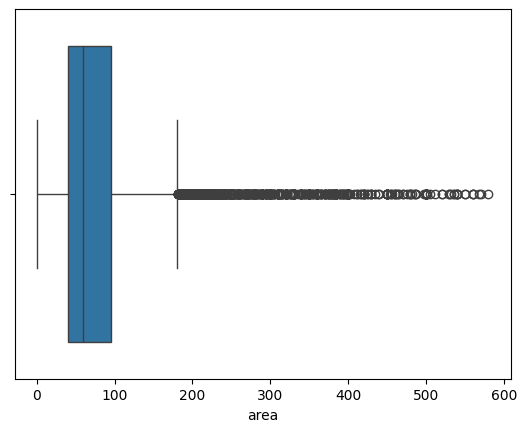

In [168]:
sns.boxplot(x=dados_aluguel['area'])

No gráfico boxplot acima, vemos em azul o posicionamento da média da área (próximo ao valor 84), e uma grande quantidade de pontos nos valores acima de 180 (aproximadamente), que são justamente os candidatos a outliers (valores que são muito discrepantes da maior parte dos valores).

In [169]:
Q1 = dados_aluguel['area'].quantile(.25)
Q1

40.0

In [170]:
Q3 = dados_aluguel['area'].quantile(.75)
Q3

96.0

In [176]:
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5*IQR
limite_superior = Q3 + 1.5*IQR

In [172]:
outliers_index = (dados_aluguel['area'] < limite_inferior) | (dados_aluguel['area'] > limite_superior)


In [173]:
dados_aluguel[outliers_index]['area']

,area
95,209
100,209
200,350
284,200
291,184
...,...
11647,300
11648,235
11649,237
11650,360


Os valores acima são os outliers da coluna área. Agora iremos verificar se precisaremos remover esses valores.

In [114]:
sem_out = dados_aluguel.copy()
sem_out[outliers_index]['area']

,area
95,209
100,209
200,350
284,200
291,184
...,...
11647,300
11648,235
11649,237
11650,360


In [115]:
sem_out.loc[outliers_index, 'area'] = np.ceil(
    sem_out.loc[outliers_index, 'total'] / sem_out.loc[outliers_index, 'rent']
    )

<Axes: xlabel='area'>

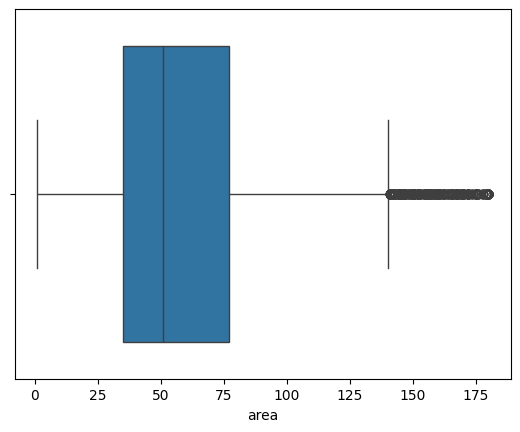

In [116]:
sns.boxplot(x=sem_out['area'])

Como podemos observar, há uma grande quantidade de candidatos a outliers de acordo com o boxplot da média. Entretanto, será que é necessário realizar alguma ação com esses valores? A resposta é: Não. Acontece que os valores de áreas de imóveis maiores realmente podem estar longe da média. Porém, a maior área de imóvel apresentada (580 m²) se trata de um valor condizente com a realidade. Dessa forma, não serão descartados os possíveis outliers.

6. Regressão linear

Iremos analisar a relação entre as variáveis do conjunto de dados.

In [135]:
df = pd.DataFrame(dados_aluguel)
colunas_numericas = ['area','bedrooms','garage','rent','total']
dados_numericos = df[colunas_numericas]
dados_numericos

,area,bedrooms,garage,rent,total
0,21,1,0,2400,2939
1,15,1,1,1030,1345
2,18,1,0,4000,4661
3,56,2,2,1750,1954
4,19,1,0,4000,4654
...,...,...,...,...,...
11652,94,2,1,4100,5778
11653,350,4,4,11250,17480
11654,84,1,2,4500,5467
11655,76,1,0,9000,10200


In [136]:
dados_numericos.corr().round(4)

,area,bedrooms,garage,rent,total
area,1.0000,0.7306,0.7331,0.6691,0.6533
bedrooms,0.7306,1.0000,0.6578,0.5356,0.5291
garage,0.7331,0.6578,1.0000,0.6190,0.6191
rent,0.6691,0.5356,0.6190,1.0000,0.9781
total,0.6533,0.5291,0.6191,0.9781,1.0000


Observações: De acordo com os valores, podemos analisar que todas as associações são positivas, conforme esperado. Já que sabemos que a área de um imóvel tende a aumentar com o aumento do número de quartos e o número de vagas de garagem. Além disso, o valor do aluguel e o valor total das despesas também tendem a ser maiores de acordo com a área do imóvel. Para todas as relações entre as variáveis, podemos observar uma relação maior de 50%. O menor valor das relações observado é de 0,5291 (relação entre número de quartos e valor total) e o maior valor das relações é de 0,9781, que corresponde à relação entre aluguel e total.

<ipython-input-137-cff924b4fab7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(dados_numericos['area'])


<Axes: title={'center': 'Distribuição de Frequências'}, xlabel='Área (m²)', ylabel='Density'>

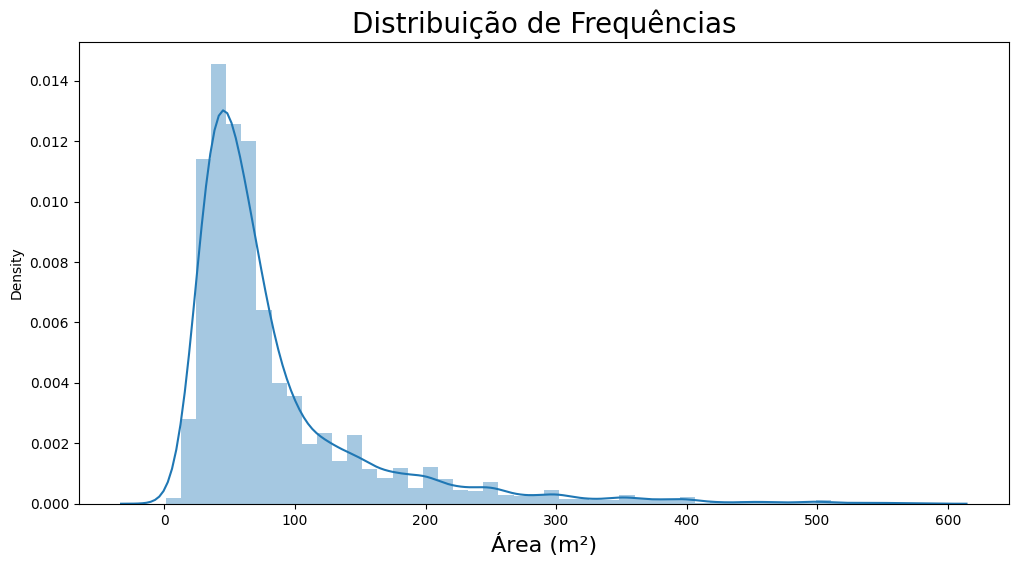

In [137]:
ax1 = sns.distplot(dados_numericos['area'])
ax1.figure.set_size_inches(12, 6)
ax1.set_title('Distribuição de Frequências', fontsize=20)
ax1.set_xlabel('Área (m²)', fontsize=16)
ax1

Vemos que a distribuição de frequências do gráfico de área apresenta assimetria à direita.

<ipython-input-120-574408c285bb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(dados_numericos['rent'])


<Axes: title={'center': 'Distribuição de Frequências'}, xlabel='Valor do aluguel (R$)', ylabel='Density'>

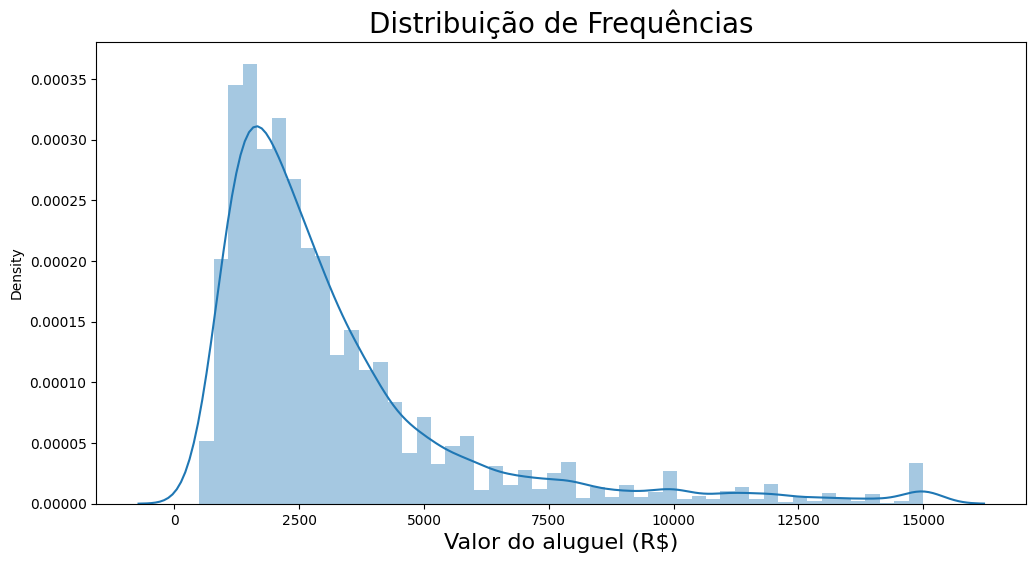

In [120]:
ax2 = sns.distplot(dados_numericos['rent'])
ax2.figure.set_size_inches(12, 6)
ax2.set_title('Distribuição de Frequências', fontsize=20)
ax2.set_xlabel('Valor do aluguel (R$)', fontsize=16)
ax2

<Axes: title={'center': 'Distribuição de Frequências'}, xlabel='Valor total (R$)', ylabel='Count'>

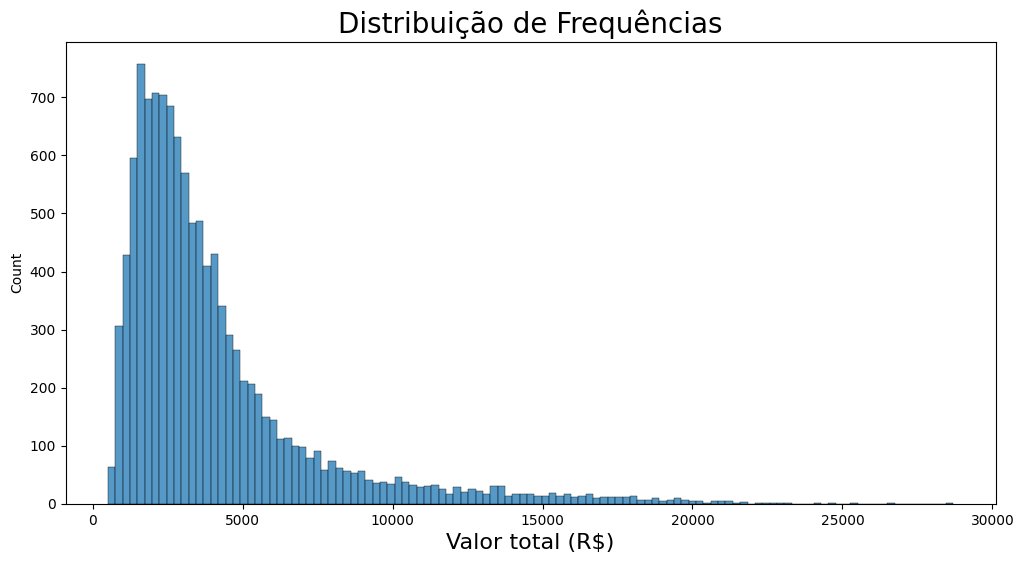

In [134]:
ax3 = sns.histplot(dados_numericos['total'])
ax3.figure.set_size_inches(12, 6)
ax3.set_title('Distribuição de Frequências', fontsize=20)
ax3.set_xlabel('Valor total (R$)', fontsize=16)
ax3

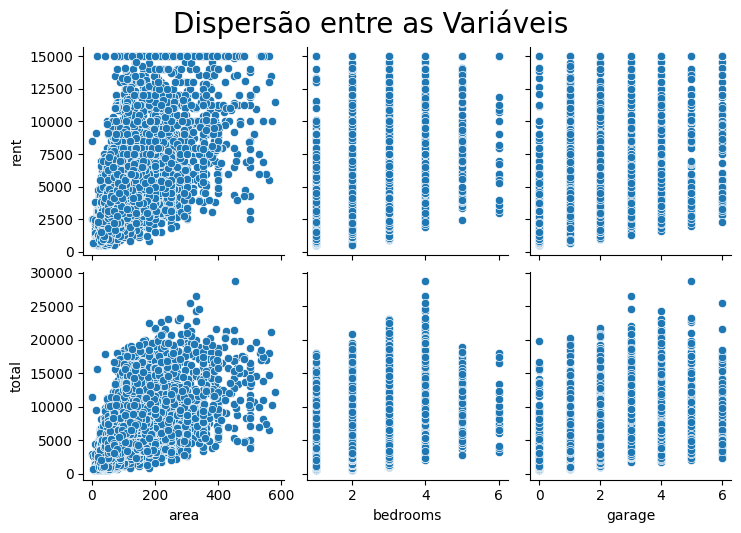

In [139]:
ax4 = sns.pairplot(dados_numericos, y_vars=['rent','total'], x_vars=['area', 'bedrooms', 'garage'])
ax4.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax4

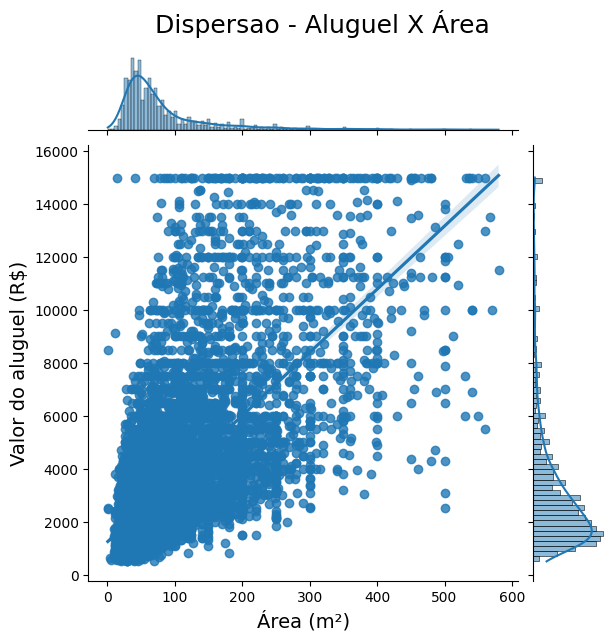

In [186]:
ax5 = sns.jointplot(x="area", y="rent", data=dados_numericos, kind='reg')
ax5.fig.suptitle('Dispersao - Aluguel X Área', fontsize=18, y=1.05)
ax5.set_axis_labels("Área (m²)", "Valor do aluguel (R$)", fontsize=14)
ax5

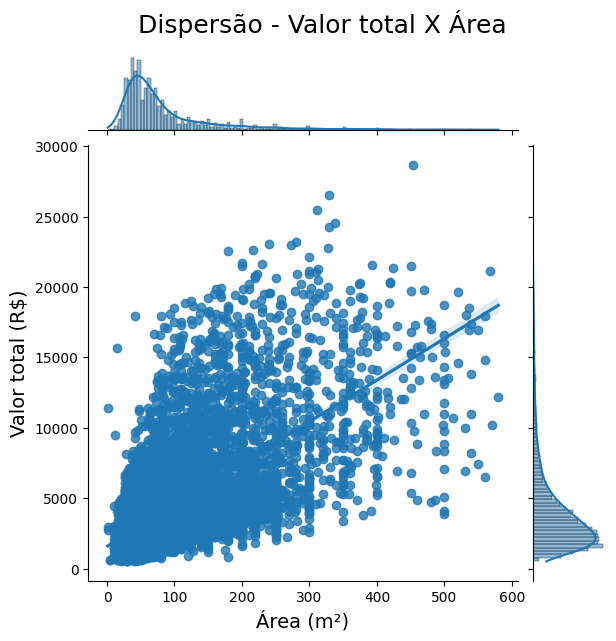

In [187]:
ax5 = sns.jointplot(x="area", y="total", data=dados_numericos, kind='reg')
ax5.fig.suptitle('Dispersão - Valor total X Área', fontsize=18, y=1.05)
ax5.set_axis_labels("Área (m²)", "Valor total (R$)", fontsize=14)
ax5

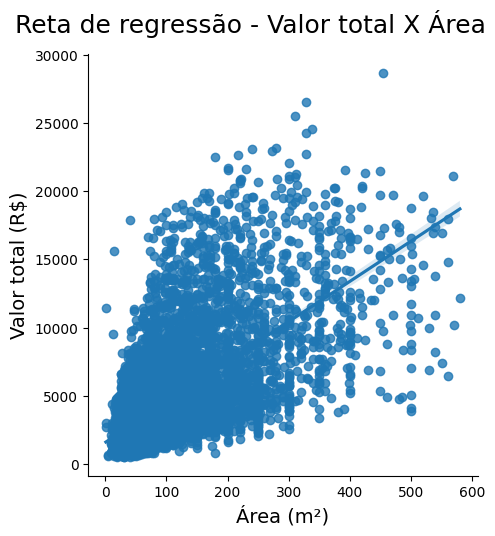

In [192]:
ax6 = sns.lmplot(x="area", y="total", data=dados_numericos)
ax6.fig.suptitle('Reta de regressão - Valor total X Área', fontsize=18, y=1.05)
ax6.set_axis_labels("Área (m²)", "Valor total (R$)", fontsize=14)
ax6

In [208]:
y = dados_numericos['rent']

In [209]:
x = sm.add_constant(dados_numericos['area'])

In [210]:
y.head()

,rent
0,2400
1,1030
2,4000
3,1750
4,4000


In [211]:
x.head()

,const,area
0,1.0,21
1,1.0,15
2,1.0,18
3,1.0,56
4,1.0,19


Estimando o modelo

In [212]:
resultado_regressao = sm.OLS(y, x).fit()

In [213]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     9417.
Date:                Thu, 22 Aug 2024   Prob (F-statistic):               0.00
Time:                        00:05:34   Log-Likelihood:            -1.0457e+05
No. Observations:               11617   AIC:                         2.092e+05
Df Residuals:                   11615   BIC:                         2.092e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1226.9696     27.709     44.280      0.0

Neste modelo, podemos observar que o valor de R² é de 0,448 e, portanto, não se pode afirmar que o modelo representa de forma satisfatória os valores reais.

Obtendo previsões.

In [161]:
dados_numericos['Y_previsto'] = resultado_regressao.predict()
dados_numericos

<ipython-input-161-07a4b84ca423>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_numericos['Y_previsto'] = resultado_regressao.predict()


,area,bedrooms,garage,rent,total,Y_previsto
0,21,1,0,2400,2939,1728.539105
1,15,1,1,1030,1345,1585.233540
2,18,1,0,4000,4661,1656.886322
3,56,2,2,1750,1954,2564.488232
4,19,1,0,4000,4654,1680.770583
...,...,...,...,...,...,...
11652,94,2,1,4100,5778,3472.090141
11653,350,4,4,11250,17480,9586.460900
11654,84,1,2,4500,5467,3233.247534
11655,76,1,0,9000,10200,3042.173447


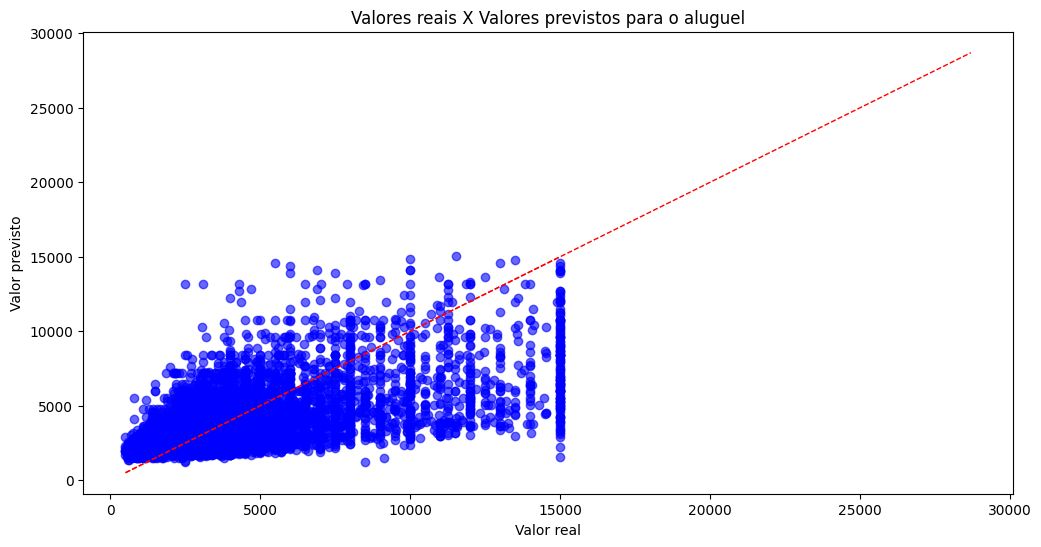

In [193]:
plt.figure(figsize=(12, 6))
plt.scatter(dados_numericos['rent'], dados_numericos['Y_previsto'], alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()],'--r', linewidth=1)
plt.xlabel('Valor real')
plt.ylabel('Valor previsto')
plt.title('Valores reais X Valores previstos para o aluguel')
plt.show()

Podemos observar que a distribuição dos valores reais possui uma certa tendência de correlação linear. Entretanto, a dispersão dos dados é muito grande. Percebe-se que há agrupamentos verticais dos dados em certos valores exatos (redondos) de aluguel (como em 10.000 e 15.000), por exemplo, o que retrata valores praticados na realidade.

Vamos agora realizar um modelo de análise de predição considerando os valores de aluguel e total (eixo y) em função da área, do número de quartos e do número de garagens (eixo x).

In [194]:
y = dados_numericos[['rent','total']]

In [195]:
X = dados_numericos[['area','bedrooms','garage']]

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [197]:
modelo = LinearRegression()

In [198]:
modelo.fit(X_train, y_train)

LinearRegression()

In [199]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.48


O valor obtido foi de 0,48. Dessa forma, o modelo apresentado é muito distante da realidade e não representa de forma razoável a relação dos valores de aluguel e total com a área, o número de quartos e o número de garagens. Para ser considerado um modelo que representa satisfatoriamente o conjunto de dados, o valor de R² deveria ser pelo menos de 0,95.

In [200]:
y_previsto = modelo.predict(X_test)

In [201]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))


R² = 0.47


Conclusões: O modelo não pode ser usado para prever de forma aproximada o custo do aluguel e das despesas totais de acordo com a área.